# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
table = soup.find('table', {'class':'table'})
temp = pd.read_html(str(table))
df = temp[0]
df.head()


/var/folders/29/_ttgq8qj3rb6q904qtqm6n140000gn/T/ipykernel_75927/2516612702.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  temp = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [25]:
# Create an empty list
temp_list = []

# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    if cols:
        cols = [col.text.strip() for col in cols]
        temp_list.append(cols)



In [26]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(temp_list, columns = ['ID', 'Terrestrial Date', 'Sol', 'LS', 'Month', 'Min Temp (C)', 'Pressure'])
df.head()

,ID,Terrestrial Date,Sol,LS,Month,Min Temp (C),Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [27]:
# Confirm DataFrame was created successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1867 non-null   object
 1   Terrestrial Date  1867 non-null   object
 2   Sol               1867 non-null   object
 3   LS                1867 non-null   object
 4   Month             1867 non-null   object
 5   Min Temp (C)      1867 non-null   object
 6   Pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [28]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1867 non-null   object
 1   Terrestrial Date  1867 non-null   object
 2   Sol               1867 non-null   object
 3   LS                1867 non-null   object
 4   Month             1867 non-null   object
 5   Min Temp (C)      1867 non-null   object
 6   Pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [29]:
# Change data types for data analysis
df['ID'] = pd.to_numeric(df['ID'], downcast = 'integer')
df['Terrestrial Date'] = pd.to_datetime(df['Terrestrial Date'])
df['Sol'] = pd.to_numeric(df['Sol'], downcast = 'integer')
df['LS'] = pd.to_numeric(df['LS'], downcast = 'integer')
df['Month'] = pd.to_numeric(df['Month'], downcast = 'integer')
df['Min Temp (C)'] = pd.to_numeric(df['Min Temp (C)'])
df['Pressure'] = pd.to_numeric(df['Pressure'])


In [30]:
# Confirm type changes were successful by examining data types again
df.dtypes

ID                           int16
Terrestrial Date    datetime64[ns]
Sol                          int16
LS                           int16
Month                         int8
Min Temp (C)               float64
Pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [31]:
# 1. How many months are there on Mars?
df.Month.nunique()

12

In [32]:
# 2. How many sols (Martian days) worth of data are there?
df.Sol.nunique()

1867

In [33]:
# 3. What is the average minimum temperature by month?
average_temp_by_month = df.groupby('Month')['Min Temp (C)'].mean()
average_temp_by_month

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp (C), dtype: float64

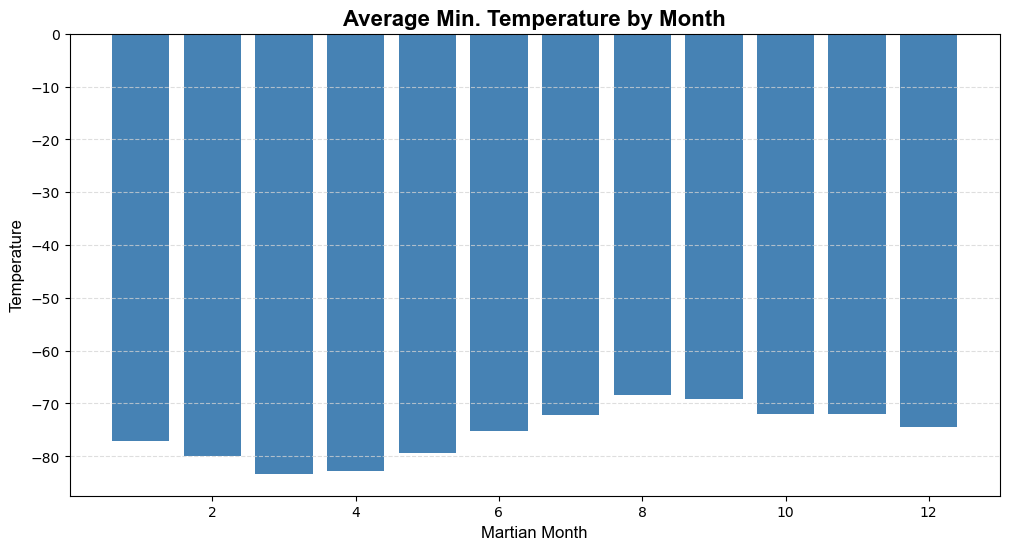

In [34]:
# Plot the average minimum temperature by month
# Data Viz Recipe
average_temp_by_month = df.groupby('Month')['Min Temp (C)'].mean()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(average_temp_by_month.index, average_temp_by_month.values, color="steelblue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Average Min. Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [35]:
# Sort the average temperature by month in ascending order
sorted_temp_by_month = average_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_temp_by_month.idxmin() 
hottest_month = sorted_temp_by_month.idxmax()

print(coldest_month, hottest_month)


3 8


In [36]:
# 4. What is the average pressure by month?
df.groupby("Month")["Pressure"].mean()


Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

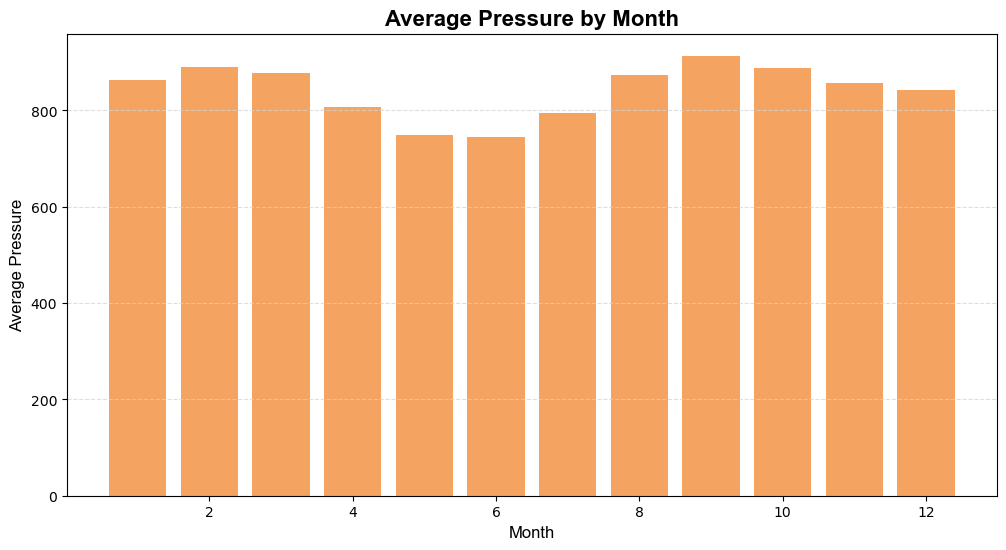

In [37]:
# Plot the average pressure by month
# Data Viz Recipe
average_pressure_by_month = df.groupby("Month")["Pressure"].mean()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color="sandybrown", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Average Pressure", fontfamily="Arial", fontsize=12)
plt.title("Average Pressure by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

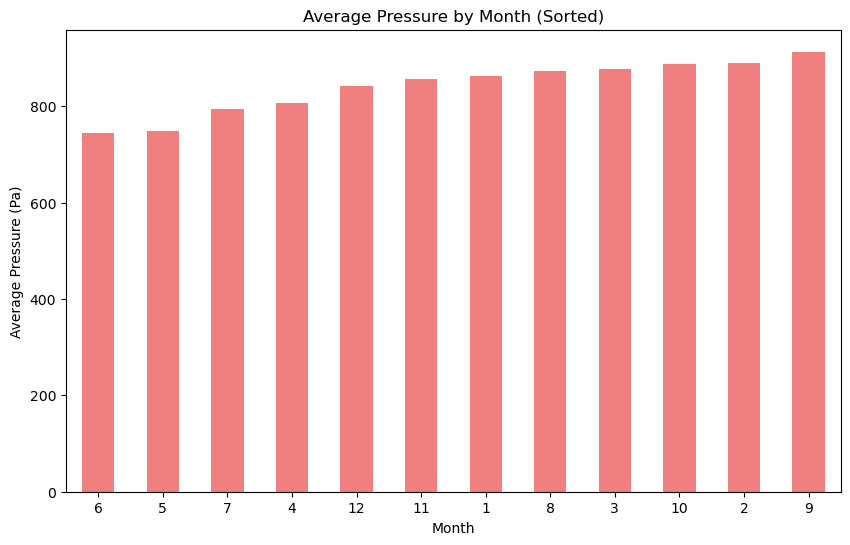

In [38]:
# Sort the average pressure by month in ascending order
sorted_pressure_by_month = average_pressure_by_month.sort_values()

# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = sorted_pressure_by_month.idxmin()
highest_pressure_month = sorted_pressure_by_month.idxmax()

# Change Canvas Size
plt.figure(figsize=(10, 6))
sorted_pressure_by_month.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.title('Average Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)  

# Show the plot
plt.show()

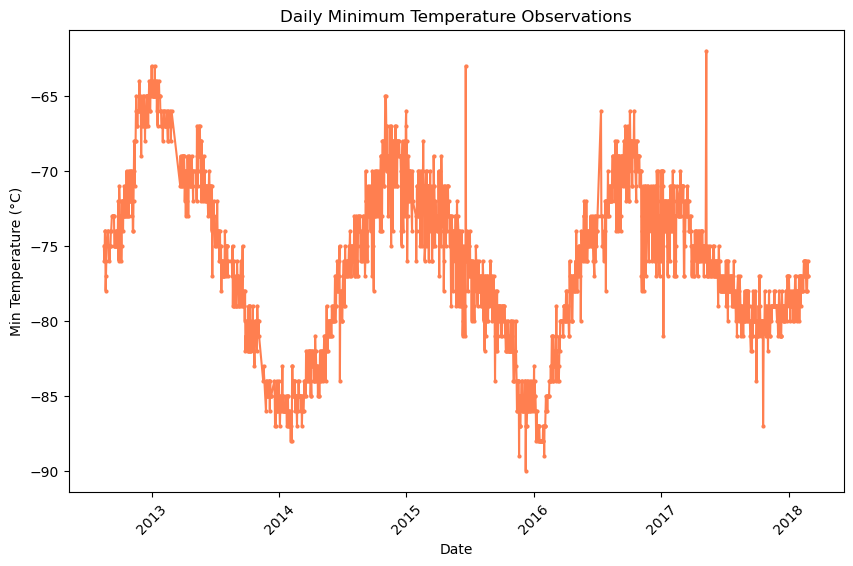

In [39]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(10, 6))
plt.plot(df['Terrestrial Date'], df['Min Temp (C)'], marker='o', linestyle='-', color='coral', markersize=2)

# Add labels and title
plt.title('Daily Minimum Temperature Observations')
plt.xlabel('Date')
plt.ylabel('Min Temperature (°C)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

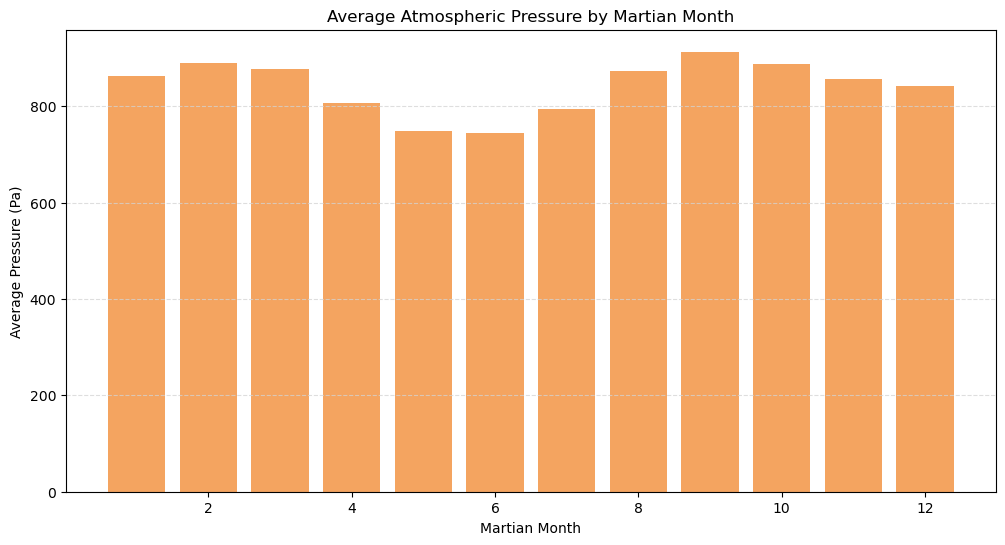

In [41]:
# Visualization: Average Pressure by Month
plt.figure(figsize=(12, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color="sandybrown")
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)
plt.show()

#### Minimum Temperature


The average minimum temperature for each Martian month has been calculated, and based on the data, here are the results:

Coldest Month: [Month 3 of Coldest Month]
Warmest Month: [Month 8 of Warmest Month]


#### Atmospheric Pressure


The analysis of atmospheric pressure across the Martian months shows the following:

Lowest Pressure Month: [6 of Lowest Pressure]
Highest Pressure Month: [9 of Highest Pressure]


#### Year Length


The plot shows daily minimum temperature observations, which should exhibit a periodic cycle of warmer and colder temperatures, representing the seasons on Mars. A full temperature cycle corresponds to a Martian year, which os 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
df.to_csv("mars_rev_data.csv", index=False)

In [43]:
browser.quit()